# Data visualization with Altair

(Update altair and add vl-concert-python by opening a new Terminal and entering:

```

conda install "altair=5.5" vl-convert-python -c conda-forge -y

```

)


In [1]:
import pandas as pd
import altair as alt
import seaborn as sns

### Get some sample data

In [2]:
weather_data_url = "https://github.com/alanjones2/uk-historical-weather/raw/main/archive/Heathrow-to-2023.csv"

weather = pd.read_csv(
    weather_data_url, 
    usecols=['Date','Month','Year','Tmax','Tmin','Tmean','Rain','Sun','Date'],
    parse_dates=['Date']
)

In [3]:
weather

Year  Month  Tmax  Tmin   Rain    Sun       Date  Tmean
0    1948      1   8.9   3.3   85.0    NaN 1948-01-01   6.10
1    1948      2   7.9   2.2   26.0    NaN 1948-02-01   5.05
2    1948      3  14.2   3.8   14.0    NaN 1948-03-01   9.00
3    1948      4  15.4   5.1   35.0    NaN 1948-04-01  10.25
4    1948      5  18.1   6.9   57.0    NaN 1948-05-01  12.50
..    ...    ...   ...   ...    ...    ...        ...    ...
908  2023      9  24.4  14.7   59.4  167.9 2023-09-01  19.55
909  2023     10  18.1  10.2  116.8  112.9 2023-10-01  14.15
910  2023     11  11.8   5.4   78.4   74.9 2023-11-01   8.60
911  2023     12  10.9   5.9   76.4   21.0 2023-12-01   8.40
912  2024      1   8.4   2.5   50.6   71.4 2024-01-01   5.45

[913 rows x 8 columns]

In [4]:
weather_2022 = (
    weather
    [
        weather['Date'].dt.year.eq(2022)
    ]
)

In [ ]:
open_streets_data_url = 'https://raw.githubusercontent.com/dlevine01/urban-data-analysis-course/refs/heads/main/Data/Source%20Data/open_streets.csv'

open_streets = pd.read_csv(
    open_streets_data_url,
    parse_dates=['report_date']
)

In [55]:
open_streets

report_date                      open_street  \
0     2020-07-02                     107th Avenue   
1     2020-07-02                     108th Avenue   
2     2020-07-02                     120th Street   
3     2020-07-02     155th Street - South Jamaica   
4     2020-07-02                     165th Street   
...          ...                              ...   
2991  2024-10-16                 West 21st Street   
2992  2024-10-16                  West 9th Street   
2993  2024-10-16      West End Avenue - 73rd-78th   
2994  2024-10-16  Willoughby Avenue - Fort Greene   
2995  2024-10-16                  Woodside Avenue   

                                      sponsor    borough  \
0                                     Jamaica     Queens   
1                                     Jamaica     Queens   
2                         South Richmond Hill     Queens   
3             Baisley Pond Park/South Jamaica     Queens   
4                               Jamaica Hills     Queens   
...                                       ...        ...   
2991  West 21st Street Open Streets Coalition  Manhattan   
2992                      Red Hook Initiative   Brooklyn   
2993                     Manhattan Day School  Manhattan   
2994         NYC Department of Transportation   Brooklyn   
2995                   Thai Community USA NYC     Queens   

                   category sponsor_type  total_weekly_hours  length_mi  
0                Full Block          NaN                  84   0.045690  
1                Full Block          NaN                  84   0.216875  
2                Full Block          NaN                  84   0.275814  
3                Full Block          NaN                  84   0.330515  
4                Full Block          NaN                  84   0.099661  
...                     ...          ...                 ...        ...  
2991   Limited Local Access    Nonprofit                  84   0.170737  
2992           Full Closure    Nonprofit                  48   0.088488  
2993  Full Closure: Schools       School                  26   0.103199  
2994   Limited Local Access   Government                  84   0.366301  
2995           Full Closure    Nonprofit                   8   0.142517  

[2996 rows x 8 columns]

## Basic plots

An altair chart has three principle components:
- The data, which is linked to the chart when passed to the `alt.Chart` constructor.
- The encoding, which matches columns in the data with channels of visual encoding (like x axis, y axis, or color)
- the mark, which sets what shapes to use to display the data.

In [7]:
(
    alt.Chart(weather_2022)
    .encode(
        x='Month',
        y='Tmax'
    )
    .mark_line()
)

alt.Chart(...)

(for comparison, a seaborn chart would be created in a similar way:)

<Axes: xlabel='Month', ylabel='Tmax'>

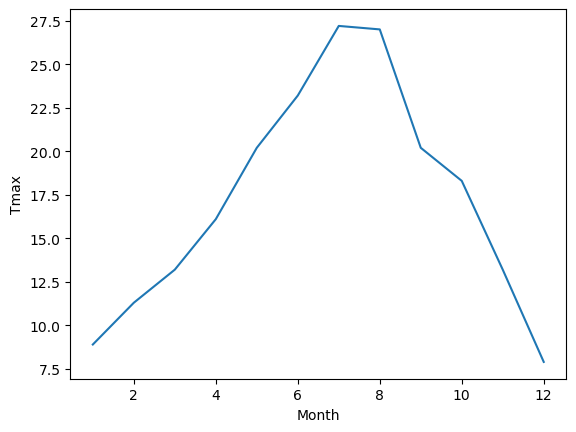

In [8]:
(
    sns.lineplot(
        data=weather_2022,
        x='Month',
        y='Tmax'
    )
)

Changing properties of the Chart affects the overall look of the entire chart:

In [9]:
(
    alt.Chart(
        weather_2022,
        width=400,
        height=150
    )
    .mark_line()
    .encode(
        x='Month',
        y='Tmax'
    )
)

alt.Chart(...)

Changing properties of the mark affects the display of that mark:

In [10]:
(
    alt.Chart(weather_2022)
    .mark_line(
        strokeDash=[2,1],
        color='red'
    )
    .encode(
        x='Month',
        y='Tmax'
    )
)

alt.Chart(...)

Changing encoding changes visual elements that vary according to the data.

In [64]:
average_weekly_hours_by_report_date_by_borough = (
    open_streets
    .groupby(['report_date','borough'])
    ['total_weekly_hours']
    .mean()
    .rename('avg_total_weekly_hours')
    .reset_index()
)

(
    alt.Chart(average_weekly_hours_by_report_date_by_borough)
    .mark_line()
    .encode(
        x='report_date',
        y='avg_total_weekly_hours',
        color='borough',
        shape='borough'
    )
)

alt.Chart(...)

In [58]:
average_weekly_hours_by_sponsor_type = (
    open_streets
    .groupby('sponsor_type')
    ['total_weekly_hours']
    .mean()
    .rename('avg_total_weekly_hours')
    .reset_index()
)

Additional fine-tuning of these encodings can be added (like sorting values along the x-axis or changing the axis title) by wrapping the specification in an `alt.X()`, `alt.Y()`, `alt.Color()`, etc. and adding additional arguments, like `sort=`

In [60]:
(
    alt.Chart(average_weekly_hours_by_sponsor_type)
    .mark_bar()
    .encode(
        x='sponsor_type',
        y='avg_total_weekly_hours',
    )
)

alt.Chart(...)

In [61]:
(
    alt.Chart(average_weekly_hours_by_sponsor_type)
    .mark_bar()
    .encode(
        x=alt.X(
            'sponsor_type',
            sort='-y'
        ),
        y='avg_total_weekly_hours',
    )
)

alt.Chart(...)

or change the axis text with `title=`, or turn on gridlines with `axis=alt.Axis(grid=True)`

There are many, many options that can be passed to [`alt.Scale()`](https://altair-viz.github.io/user_guide/generated/core/altair.Scale.html) and [`alt.Axis()`](https://altair-viz.github.io/user_guide/generated/core/altair.Axis.html)` to customize the view

In [77]:
(
    alt.Chart(average_weekly_hours_by_sponsor_type)
    .mark_bar()
    .encode(
        x=alt.X(
            'sponsor_type',
            sort='-y',
            axis=alt.Axis(grid=True)
        ),
        y=alt.Y(
            'avg_total_weekly_hours',
            title='Weekly hours'
        ),
        color=alt.Color(
            'sponsor_type',
            title='Sponsor type',
            legend=alt.Legend(titleFont='serif'),
            sort='-y'
        )
    )
)

alt.Chart(...)

A few more sample basic charts:

In [18]:
(
    alt.Chart(weather)
    .mark_point()
    .encode(
        x='Tmin',
        y='Tmax'
    )
)

alt.Chart(...)

Reducing opacity is a way to see concentrations of overlapping points

In [19]:
(
    alt.Chart(weather)
    .mark_point(
        opacity=0.2,
    )
    .encode(
        x='Tmin',
        y='Tmax'
    )
)

alt.Chart(...)

In [20]:
(
    alt.Chart(weather)
    .mark_point()
    .encode(
        x='Sun',
        y='Rain'
    )
)

alt.Chart(...)

In [22]:
(
    alt.Chart(weather)
    .mark_point()
    .encode(
        x='Sun',
        y='Tmean'
    )
)

alt.Chart(...)

In [23]:
(
    alt.Chart(weather_2022)
    .mark_bar()
    .encode(
        x='Month',
        y='Rain'
    )
)

alt.Chart(...)

Altair infers the data type of each column from the DataFrame and will adjust the display for (generally) the optimal visual for each type. But overriding the data type can make more sense and yield a better display for particular data.

Change the data type with an indicator after the column, for :
- `:Q`uantitative
- `:N`ormative
- `:O`rdinal
- `:T`emporal

e.g.:

In [24]:
(
    alt.Chart(weather_2022)
    .mark_bar()
    .encode(
        x='Month:O',
        y='Rain'
    )
)

alt.Chart(...)

## Date time summarization

Using datetime types along with transformations (instead of numbers representing dates or years) creates even better charts for timeline data.

Date-time truncation specifications can be wrapped around column specifications for neater charts or for aggregation:

In [25]:
(
    alt.Chart(weather_2022)
    .mark_bar()
    .encode(
        x='yearmonth(Date)',
        y='Rain'
    )
)

alt.Chart(...)

In [26]:
(
    alt.Chart(weather_2022)
    .mark_line()
    .encode(
        x='month(Date)',
        y='Tmin'
    )
)

alt.Chart(...)

(changing the data type from time to ordinal with `:O` creates a discrete legend)

In [27]:
weather_since_2014 = (
    weather
    [
        weather['Year'] > 2014
    ]
)

(
    
    alt.Chart(weather_since_2014)
    .mark_line()
    .encode(
        x='month(Date)',
        y='Tmax',
        color='year(Date):O'
    )   
)

alt.Chart(...)

## Aggregate

Aggregation functions can be wrapped around the column specification to summarize data in each group:

In [ ]:
(
    alt.Chart(weather)
    .mark_line()
    .encode(
        x='month(Date)',
        y='mean(Tmax)'
    )
)

alt.Chart(...)

In [ ]:
(
    alt.Chart(weather)
    .mark_bar()
    .encode(
        x='year(Date)',
        y='max(Rain)'
    )
)

alt.Chart(...)

### Summarize and aggregate within Altair

Option 1a: use pandas to create a summary DataFrame then start the altair chart with that summary:

In [99]:
average_weekly_hours_by_report_date_by_borough = (
    open_streets
    .groupby(['report_date','borough'])
    ['total_weekly_hours']
    .mean()
    .rename('avg_total_weekly_hours')
    .reset_index()
)

(
    alt.Chart(average_weekly_hours_by_report_date_by_borough)
    .mark_line()
    .encode(
        x='report_date',
        y='avg_total_weekly_hours',
        color='borough',
    )
)

alt.Chart(...)

Option 1b: group and summarize the data and `pipe` to altair:

In [100]:
(
    open_streets
    .groupby(['report_date','borough'])
    ['total_weekly_hours']
    .mean()
    .rename('avg_total_weekly_hours')
    .reset_index()
    .pipe(alt.Chart)
    .mark_line()
    .encode(
        x='report_date',
        y='avg_total_weekly_hours',
        color='borough',
    )
)

alt.Chart(...)

Option 2: use altair's summarizer wrappers around variable names:

In [101]:
(
    alt.Chart(open_streets)
    .mark_line()
    .encode(
        x='yearmonth(report_date)',
        y='mean(total_weekly_hours)',
        color='borough'
    )
)

alt.Chart(...)

Option 1:

In [102]:
(
    open_streets
    .groupby(['report_date','borough'])
    ['length_mi']
    .sum()
    .rename('total_length')
    .reset_index()
    .pipe(alt.Chart)
    .mark_line()
    .encode(
        x='report_date',
        y='total_length',
        color='borough',
    )
)

alt.Chart(...)

Option 2:

In [103]:
(
    alt.Chart(open_streets)
    .mark_line()
    .encode(
        x='report_date',
        y='sum(length_mi)',
        color='borough',
    )
)

alt.Chart(...)

## Combine and layer

Multiple permutations of chats can be created (starting from the same base for shared components), then faceted or layered.

In [14]:
(
    alt.Chart(weather_2022)
    .mark_line()
    .encode(
        x='yearmonth(Date)',
        y='Tmax'
    )
)

alt.Chart(...)

Start with a base chart and add marks and encodings:

In [42]:
base = (
    alt.Chart(weather_2022)
    .encode(
        x='yearmonth(Date)'
    )
)

tmean = (
    base
    .mark_line()
    .encode(
        y='Tmax'
    )
)

sun = (
    base
    .mark_bar(
        color='orange'
    )
    .encode(
        y='Sun'
    )
)

In [43]:
sun

alt.Chart(...)

Pair side-by-side with `|`

In [39]:
sun | tmean

alt.HConcatChart(...)

Layer charts with `+`.

By default, layered charts will share axes. These should be separate (temperature is measured in degrees, sun in hours). Create an independent secondary y axis with `.resolve_scale()`

In [41]:
(sun + tmean).resolve_scale(y='independent')

alt.LayerChart(...)

Specifying a `column` channel will facet (repeat) the chart for each value in that column

In [ ]:
(
    alt.Chart(weather)
    .mark_line()
    .encode(
        x='year(Date)',
        y='Tmax',
        column='month(Date)'
    )   
)

alt.Chart(...)

## Smoothed lines

the `interpolate` option smooths lines through various computations methods

In [26]:
(
    weather
    [
        weather['Year'] > 2018
    ]
    .pipe(alt.Chart)
    .properties(width=500)
    .mark_line()
    .encode(
        x='yearmonth(Date)',
        y='Tmax',
    )
)

alt.Chart(...)

In [286]:
(
    weather
    [
        weather['Year'] > 2018
    ]
    .pipe(alt.Chart)
    .properties(width=500)
    .mark_line(
        interpolate='natural'
    )
    .encode(
        x='yearmonth(Date)',
        y='Tmax',
    )
)

alt.Chart(...)

In [170]:
(
    weather
    [
        weather['Year'] > 2018
    ]
    .pipe(alt.Chart)
    .properties(width=500)
    .mark_line(
        interpolate='monotone',
    )
    .encode(
        x='yearmonth(Date)',
        y='Tmax'
    )
)

alt.Chart(...)

## Melt to long

altair needs data in *long* form (also called *tidy* form), where each row is a single observation and columns specify the categories. Use `melt()` to rearrange wide-form data to long. (If aggregating, applying a `groupby()` then a `reset_index()` also yields long-form data.)

In [289]:
weather_long = (
    weather
    [['Date','Tmin','Tmax']]
    .melt(
        id_vars=['Date'],
        value_vars=['Tmin','Tmax'],
        value_name='temperature'
    )
)

weather_long

Date variable  temperature
0    1948-01-01     Tmin          3.3
1    1948-02-01     Tmin          2.2
2    1948-03-01     Tmin          3.8
3    1948-04-01     Tmin          5.1
4    1948-05-01     Tmin          6.9
...         ...      ...          ...
1821 2023-09-01     Tmax         24.4
1822 2023-10-01     Tmax         18.1
1823 2023-11-01     Tmax         11.8
1824 2023-12-01     Tmax         10.9
1825 2024-01-01     Tmax          8.4

[1826 rows x 3 columns]

In [292]:
(
    alt.Chart(weather_long)
    .mark_line()
    .encode(
        x='month(Date):O',
        y='mean(temperature)',
        color='variable',
    )
)

alt.Chart(...)

In [293]:
(
    alt.Chart(weather_long)
    .mark_bar()
    .encode(
        x='month(Date):O',
        y='mean(temperature)',
        color='variable',
        xOffset='variable'
    )
)

alt.Chart(...)

### Stacked vs offset bar plot

By default bars are stacked

In [104]:
(
    alt.Chart(open_streets)
    .mark_bar()
    .encode(
        x='year(report_date):O',
        y='sum(length_mi)',
        color='borough'
    )
)

alt.Chart(...)

Use `xOffset()` to make side-by-side bars.

In [ ]:
(
    alt.Chart(open_streets)
    .mark_bar()
    .encode(
        x='year(report_date):O',
        y='mean(length_mi)',
        color='borough',
        xOffset='borough'
    )
)

alt.Chart(...)

## Interactive charts

In [92]:
open_streets_newest_record = (
    open_streets
    .sort_values('report_date')
    .groupby('open_street')
    [[
        'total_weekly_hours',
        'length_mi',
        'sponsor',
        'borough',
        'report_date'
    ]]
    .last()
    .reset_index()
    .rename(columns={'report_date':'last_observed'})
)

(
    alt.Chart(open_streets_newest_record)
    .mark_point()
    .encode(
        x='yearmonth(last_observed)',
        y='length_mi',
        color='borough'
    )
)

alt.Chart(...)

In [97]:
(
    alt.Chart(
        open_streets_newest_record,
        width=500
    )
    .mark_point()
    .encode(
        x='yearmonth(last_observed):O',
        y='length_mi',
        color='borough',
        tooltip=[
            'open_street',
            'sponsor',
            'borough',
            'length_mi',
            'total_weekly_hours',
        ]
    )
    .interactive()
)

alt.Chart(...)

## A chart ready for publication

In [165]:
chart = (
    alt.Chart(
        open_streets,
        width=400,
        title=alt.Title(
            'Open hours fell drastically from 2021 to 2022 and have not recovered',
            subtitle=['Staten Island and the Bronx have the fewest open hours']
        )
    )
    .mark_line(
        point=True,
        size=1,
        strokeWidth=2
    )
    .encode(
        x=alt.X(
            'yearmonth(report_date)',
            title='Quarter'
        ),
        y=alt.Y(
            'mean(total_weekly_hours)',
            title='Average weekly hours',
            # axis=alt.Axis(grid=True)
        ),
        color=alt.Color(
            'borough',
            title='Borough'
        )
    )
)

chart

alt.Chart(...)

In [167]:
!mkdir "../Visuals"

In [171]:
chart.save('../Visuals/weekly_open_hours_by_borough_by_quarter.svg')

In [172]:
chart.save('../Visuals/weekly_open_hours_by_borough_by_quarter.png')

## Pivot to wide and copy to send to Datawrapper

While altair expects data in long format, Datawrapper expects data in wide format.


Use `groupby()` then `unstack()` to pivot to wide. (`pivot()` will work also, if you are not grouping and aggregating)

In [137]:
count_open_streets_by_quarter_by_borough = (
    open_streets
    .groupby([
        'report_date',
        'borough'
    ])
    ['open_street']
    .nunique()
    .rename('count_open_streets')
    .reset_index()
)

count_open_streets_by_quarter_by_borough

report_date        borough  count_open_streets
0   2020-07-02          Bronx                  18
1   2020-07-02       Brooklyn                  68
2   2020-07-02      Manhattan                  49
3   2020-07-02         Queens                  37
4   2020-07-02  Staten Island                   4
..         ...            ...                 ...
85  2024-10-16          Bronx                  22
86  2024-10-16       Brooklyn                  45
87  2024-10-16      Manhattan                  63
88  2024-10-16         Queens                  32
89  2024-10-16  Staten Island                   5

[90 rows x 3 columns]

In [141]:
(
    alt.Chart(count_open_streets_by_quarter_by_borough)
    .mark_line()
    .encode(
        x='report_date',
        y='count_open_streets',
        color='borough'
    )
)

alt.Chart(...)

In [142]:
(
    open_streets
    .groupby([
        'report_date',
        'borough'
    ])
    ['open_street']
    .nunique()
    .rename('count_open_streets')
    .unstack()
    .to_clipboard()
)

## Interactive cross filtering

Check out the [examples](https://altair-viz.github.io/gallery/index.html) for sample code to build from


In [173]:
pts = alt.selection_point(encodings=['x'])

rect = (
    alt.Chart(weather)
    .mark_rect()
    .encode(
        alt.X('Rain').bin(),
        alt.Y('Sun').bin(),
        alt.Color('count()').scale(scheme='greenblue').title('Total Records')
    )
)

circ = (
    rect
    .mark_point()
    .encode(
        alt.ColorValue('grey'),
        alt.Size('count()').title('Records in Selection')
    )
    .transform_filter(
        pts
    )
)

bar = (
    alt.Chart(
        weather, 
        width=550, 
        height=200
    )
    .mark_bar()
    .encode(
        x='month(Date)',
        y='mean(Tmean)',
        color=alt.when(pts).then(alt.ColorValue("steelblue")).otherwise(alt.ColorValue("grey"))
    )
    .add_params(pts)
)

chart = alt.vconcat(
    bar,
    rect + circ
).resolve_legend(
    color="independent",
    size="independent"
)

chart

alt.VConcatChart(...)

In [174]:
chart.save('../Visuals/rain_sun_temp_by_month.html')